## Часть 1. EDA


1. Скачайте данные с Kaggle по ценам на жильё в Airbnb в Нью-Йорке:https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
2. Пройдите по основным шагам работы с данными: 
3. выкиньте ненужные признаки: id, name, host_id, host_name, last_review
4. визуализируйте базовые статистики данных: распределения признаков, матрицу попарных корреляций, постройте pair plots
5. по результатам анализа произведите предобработку переменныхЧасть 

## Preprocessing & Feature Engineering

1. Ваша цель получить как можно более высокие метрики качества (можно взять несколько, R2, MAE, RMSE), сконцентрировавшись на преобразовании признаков.
2. Опробуйте различные техники:

– работа с категориальными переменными (можно начать с dummy);

– замена аномалий;

– различные варианты шкалирования непрерывных переменных (StandardScaler, RobustScaler, и.т.д.);

– обратите внимание на распределение целевой переменной, возможно, с ней тоже можно поработать;

3. Попробуйте на основании имеющихся переменных создать новые, которые могли бы улучшить качество модели. Например, можно найти координаты Манхэттена (самого дорогого района) и при помощи широты и долготы, а также евклидового расстояния создать новую переменную - расстояние от квартиры до этого района. Возможно, такой признак будет работать лучше, чем просто широта и долгота.


## Часть 3. Моделирование

1. Отложите 30% данных для тестирования.
2. Постройте модели простой линейной регрессии, RidgeCV, LassoCV и ElasticNetCV.
3. Измерьте качество каждой и визуализируйте важность признаков.
4. Сделайте интересные выводы :)

В ноутбуке желательно видеть:

Понятное описание: какие техники и алгоритмы были опробованы - было бы неплохо в самом начале тезисно выписать опробованные методики и их результат (помогло / не помогло).
Наличие визуализаций (не обязательно строить много графиков - можно несколько репрезентативных).
Наличие хотя бы одной модификации данных, приводящей к улучшению результатов.

In [127]:
# imports
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tools import categorical

### Скачайте данные с Kaggle по ценам на жильё в Airbnb в Нью-Йорке:https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data


In [128]:
# loading the data from pc
data = pd.read_csv('AB_NYC_2019.csv', index_col=0)
cols_2_drop = ['name', 'host_id', 'host_name', 'last_review',]
categorical_columns = ['neighbourhood_group','neighbourhood','room_type']
data = data.drop(cols_2_drop, axis=1)
data.head

<bound method NDFrame.head of          neighbourhood_group       neighbourhood  latitude  longitude  \
id                                                                      
2539                Brooklyn          Kensington  40.64749  -73.97237   
2595               Manhattan             Midtown  40.75362  -73.98377   
3647               Manhattan              Harlem  40.80902  -73.94190   
3831                Brooklyn        Clinton Hill  40.68514  -73.95976   
5022               Manhattan         East Harlem  40.79851  -73.94399   
...                      ...                 ...       ...        ...   
36484665            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
36485057            Brooklyn            Bushwick  40.70184  -73.93317   
36485431           Manhattan              Harlem  40.81475  -73.94867   
36485609           Manhattan      Hell's Kitchen  40.75751  -73.99112   
36487245           Manhattan      Hell's Kitchen  40.76404  -73.98933   

                room

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48895 entries, 2539 to 36487245
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.5+ MB


In [147]:
data.isnull().values.any()

np.True_

In [131]:
data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,
2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
36484665,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
36485057,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
36485431,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27


In [132]:
data.describe(include='all')

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
unique,5,221,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN
freq,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000


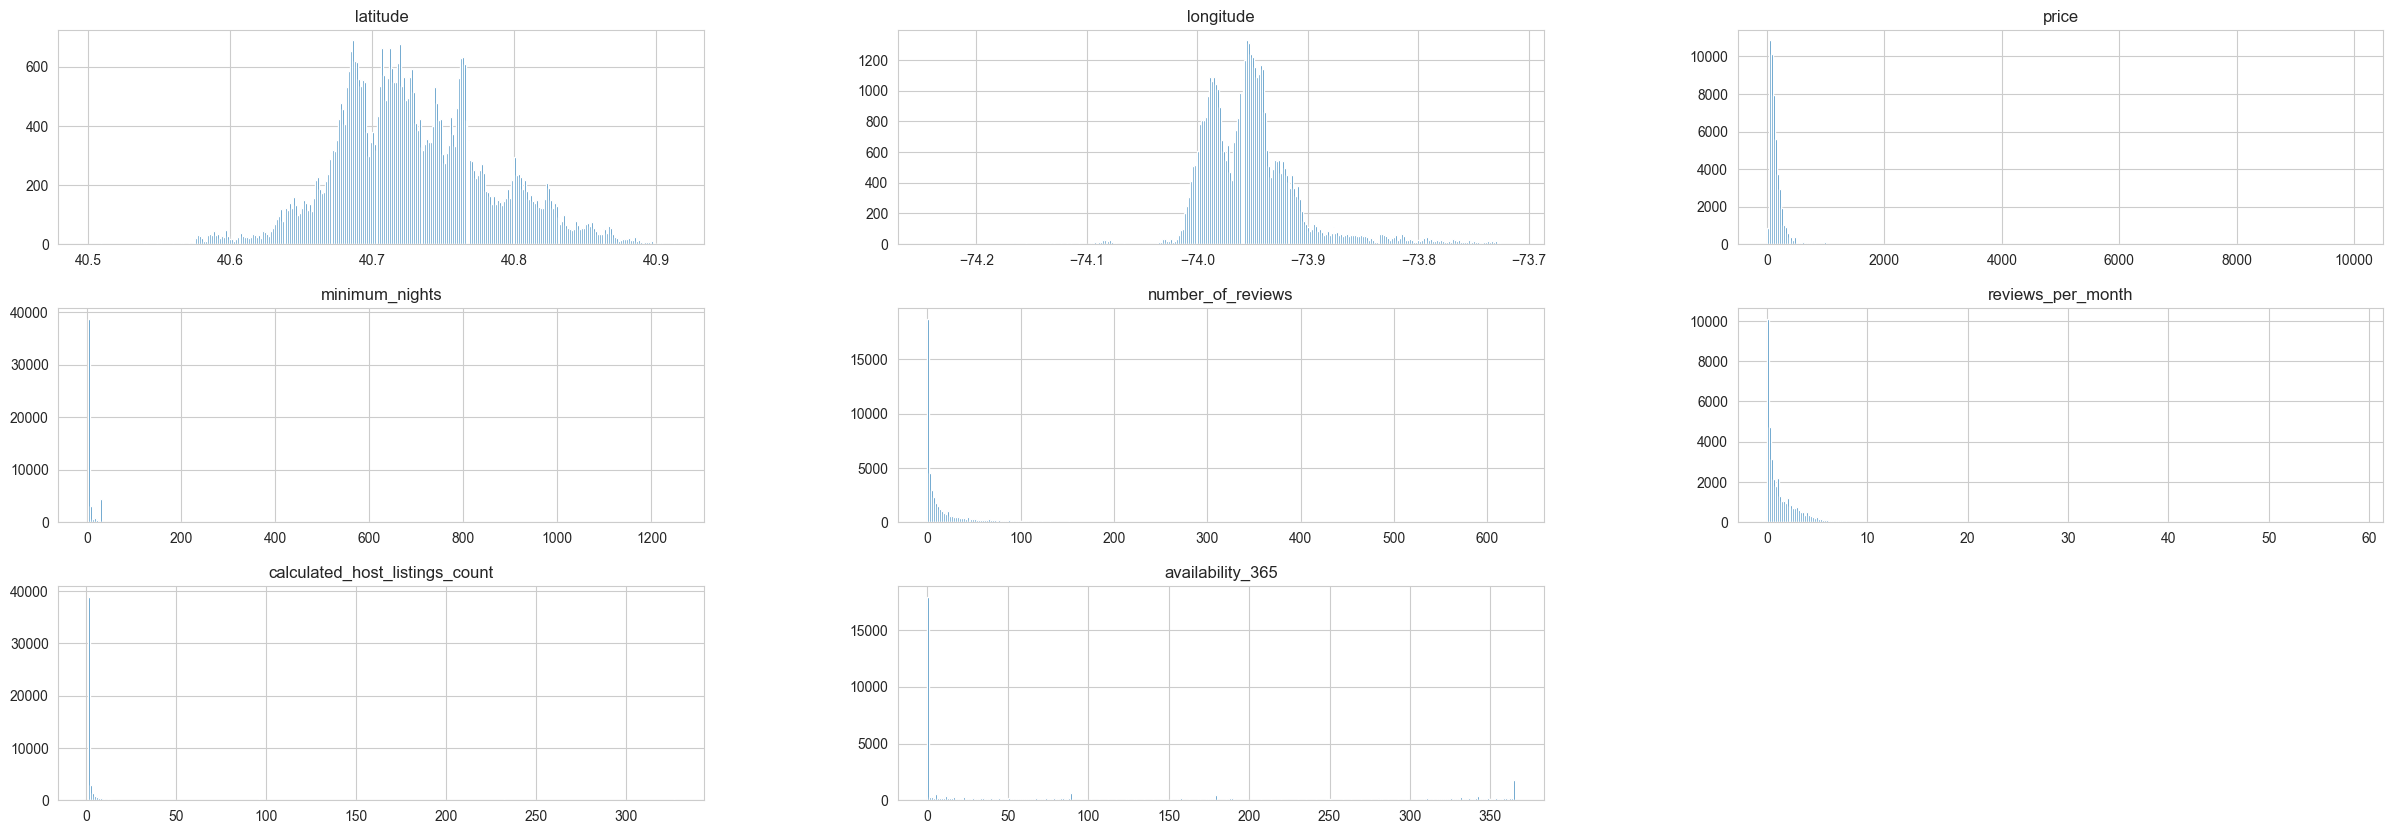

In [133]:
data.hist(bins=300,figsize = (30,10));

In [134]:
data[data['price']>9000]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,
4737930,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,0.02,1,0
7003697,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0
9528920,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,0.14,1,83
13894339,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0
22436899,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,1,83
31340283,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,1,365


### Попытка понять, а что творится внутри различных районов города
но попытка не очень удачная

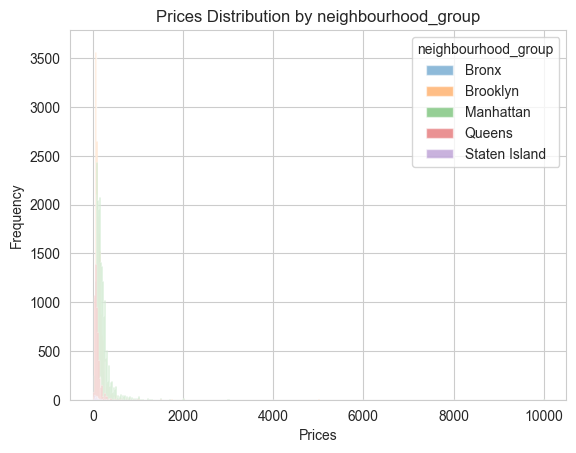

In [135]:
from matplotlib import pyplot as plt

#define points values by groupnin
Bronx = data.loc[data['neighbourhood_group'] == 'Bronx', 'price']
Brooklyn = data.loc[data['neighbourhood_group'] == 'Brooklyn', 'price']
Manhattan = data.loc[data['neighbourhood_group'] == 'Manhattan', 'price']
Queens = data.loc[data['neighbourhood_group'] == 'Queens', 'price']
Staten_Island = data.loc[data['neighbourhood_group'] == 'Staten Island', 'price']

#add three histograms to one plot
plt.hist(Bronx, bins=500, alpha=0.5, label='Bronx')
plt.hist(Brooklyn,bins=500, alpha=0.5, label='Brooklyn')
plt.hist(Manhattan,bins=500, alpha=0.5, label='Manhattan')
plt.hist(Queens,bins=500, alpha=0.5, label='Queens')
plt.hist(Staten_Island,bins=500, alpha=0.5, label='Staten Island')

#add plot title and axis labels
plt.title('Prices Distribution by neighbourhood_group')
plt.xlabel('Prices')
plt.ylabel('Frequency')

#add legend
plt.legend(title='neighbourhood_group')

#display plot
plt.show()

In [136]:
data.groupby('neighbourhood_group')['price'].describe()
# вот так получше, по медиане видно, что некоторые районы города дороже других 

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


In [137]:
data.groupby('neighbourhood')['price'].median()
# подрайоны города ещё сильнее влияют на распределение цен

neighbourhood
Allerton            66.5
Arden Heights       72.5
Arrochar            65.0
Arverne            125.0
Astoria             85.0
                   ...  
Windsor Terrace    123.0
Woodhaven           52.0
Woodlawn            68.0
Woodrow            700.0
Woodside            60.0
Name: price, Length: 221, dtype: float64

In [138]:
data.drop(categorical_columns, axis=1).corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


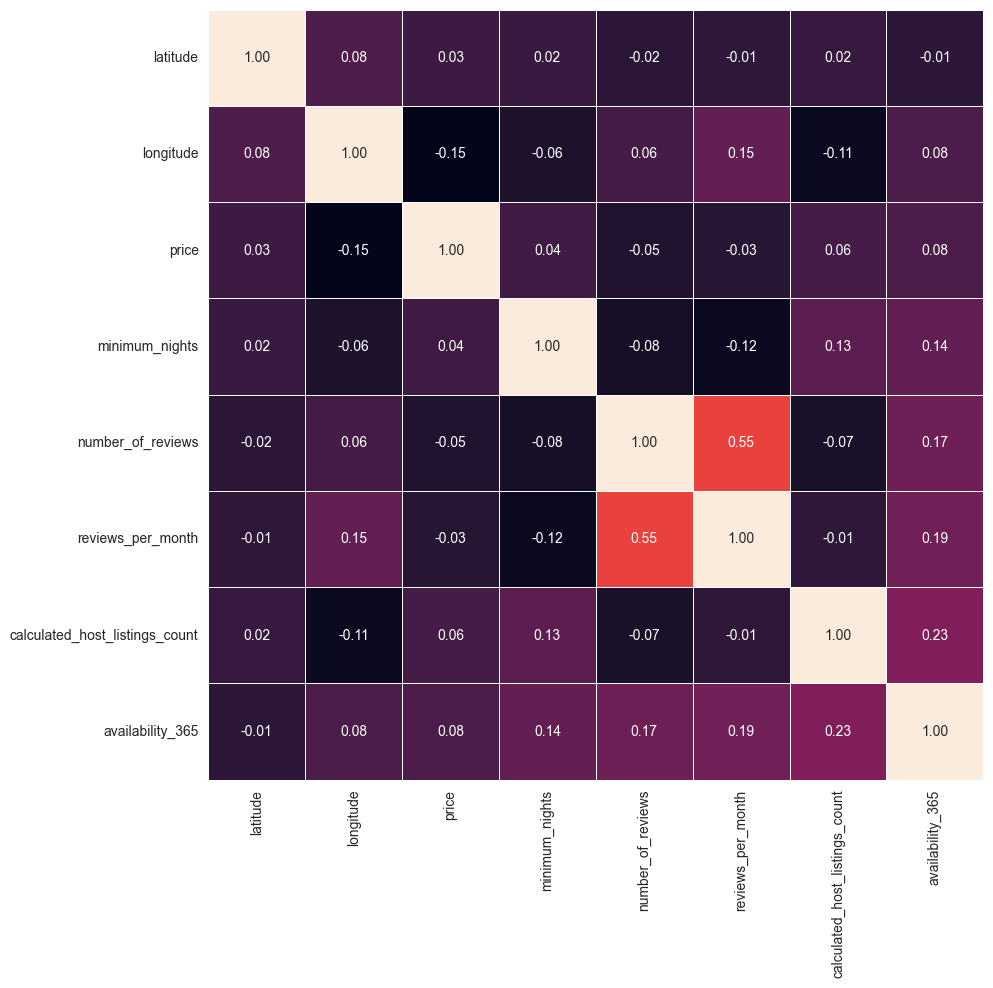

In [139]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.drop(categorical_columns, axis=1).corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()
# А никакой коррелии особо и нет

### Начнём готовить данные

In [140]:
### заменим категориальные переменные
data = pd.get_dummies(data, columns=categorical_columns, prefix_sep='=')
#data=data.drop(categorical_columns, axis=1)
### разделим на train and test
X_train, X_test, y_train, y_test = train_test_split(data.drop('price', axis=1), data['price'], test_size=0.3, random_state=84)
### сделаем масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Пробуем стандартную линейную регрессию

In [141]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
lin_reg.coef_, lin_reg.intercept_




ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values